## Parte 1
## Rede neural com camadas densas
### i.e. Perceptron Multicamadas (MLP - Multilayer Perceptron)

Para estudar esse modelo utilizaremos o problema da classificação de imagens

Serão utilizadas as bibliotecas Tensorflow e Keras, que simplificam bastante a implementação. Como o Keras é uma abstração do Tensorflow, perdemos um pouco a capacidade de customização do código.

#### Moacir A. Ponti / 2018

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
#from keras.datasets import fashion_mnist

from keras import backend as K

Using TensorFlow backend.


Importamos as bibliotecas necessárias. A primeira linha é para melhorar a compatibilidade entre python2 e python3. Depois importamos:
- a biblioteca tensorflow, a matplotlib para gerar gráficos 
- a biblioteca numpy com muitas funcoes para processamento vetorial
- a biblioteca keras, sendo importados pacotes com os dados que serão utilizados nesse notebook (MNIST e Fashion MNIST)

### Base de dados

A seguir iremos carregar efetivamente os dados de treinamento e de testes, cada qual dividido nos dados de entrada $x$ (nesse caso imagens) e seus respectivos rótulos $y$

In [2]:
# carrega as imagens e rotulos de treinamento e teste, separando em 4 matrizes
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

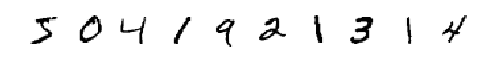

In [3]:
# visualizando algumas imagens de treinamento
n_imgs = 10
for im in np.arange(n_imgs):
  plt.subplot(1,n_imgs,im+1)
  plt.imshow(x_train[im])
  plt.axis('off')

A seguir armazenaremos em variáveis algumas informações importantes como:
- o tamanho das imagens a serem processadas
- o tamanho do *minibatch*, ou seja a quantidade de imagens a serem carregadas em cada iteracao do algoritmo de treinamento da rede neural
- o número de épocas: em uma *época/epoch* o algoritmo utiliza todas as imagens do conjunto de treinamento (por exemplo, para a MNIST significa carregar 60 mil imagens e utilizá-las para treinar a rede)

In [4]:
# capturando o tamanho das imagens da base de dados por meio do 'shape' 
# dos arrays carregados
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

# tamanho do batch por iteracao
batch_size = 32

# número de épocas 
epochs = 4

# número de classes
num_classes = len(np.unique(y_train))

# re-formatando as imagens de forma que sejam transformadas em um vetor
# as imagens 28x28 se tornam vetores de 784x1
# o conjunto de treinamento possui 60000 imagens e o de teste 10000 imagens
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)

In [5]:
# os pixels das imagens sao reescalados para melhor processamento
# em particular divide-se por 255 para que os valores fiquem entre 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print('Dataset size:')
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convertemos os rótulos numéricos em categóricos
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

Dataset size:
60000 train samples
10000 test samples


### Configuração do modelo de aprendizado

Aqui iremos utilizar o Keras para criar múltiplas camadas, em particular são utilizadas 2 camadas intermediárias:
- Camada densa (fully connected) com 64 neurônios
- Camada densa com 32 neurônios
- Em ambas a função de ativação utilizada é a 'ReLU'

Por fim uma camada densa de saída é utilizada como classificador:
- Camada densa com 10 neurônios (relativo ao número de classes) e função de ativação do tipo softmax

A função summary mostra as características do modelo

In [6]:
model = tf.keras.Sequential()
# a primeira camada deve informar o tamanho da entrada
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(img_rows*img_cols,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


Note como o modelo com duas camadas densas (64 e 32 neurônios) é bastante grande, com cerca de 52 mil parâmetros a serem treinados, o que exige grande quantidade de dados.

### Compilação e treinamento do modelo
Agora iremos compilar o modelo, definindo:
- A função de custo: utilizamos a entropia cruzada categórica, ou seja, que utiliza rótulos
- O método de otimização:  utilizamos um método baseado no gradiente descendente bastante utilizado conhecido por RMSprop, porém há outros como Adam e AdaGrad e seus parâmetros como a taxa de aprendizado (*learning rate*)
-  As métricas a serem computadas durante o treinamento: além da função de custo em si, automaticamente computada, também vamos armazenar a acurácia

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.002),
              metrics=['accuracy'])


Finalmente, treinamos o método pela função *fit*, que ajusta os parâmetros aos dados rotulados x_train, y_train e utilizando as configurações previamente definidas.

Também informamos quais são os dados de validação. A opção *verbose* exibe os detalhes do processo de treinamento na tela

In [8]:
# a variável history guarda os dados do processo de treinamento para
# posteriormente analisarmos
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 4s 64us/step - loss: 0.2497 - acc: 0.9247 - val_loss: 0.1312 - val_acc: 0.9593
Epoch 2/4
60000/60000 [==============================] - 4s 61us/step - loss: 0.1233 - acc: 0.9644 - val_loss: 0.1136 - val_acc: 0.9669
Epoch 3/4
60000/60000 [==============================] - 4s 59us/step - loss: 0.1007 - acc: 0.9718 - val_loss: 0.1154 - val_acc: 0.9683
Epoch 4/4
60000/60000 [==============================] - 4s 59us/step - loss: 0.0889 - acc: 0.9750 - val_loss: 0.1140 - val_acc: 0.9729


### Avaliação do modelo
Com o modelo já treinado, podemos agora avaliar o seu desempenho, tanto no conjunto de treinamento quanto no conjunto de testes

In [9]:
# avalia as métricas no conjunto de teste
metrics = model.evaluate(x_test, y_test, verbose=0)

# cada métrica é armazenada em uma posicao do vetor
print('Test loss: %.4f' % (metrics[0]))
print('Test accuracy: %.4f' % (metrics[1]))

Test loss: 0.1140
Test accuracy: 0.9729


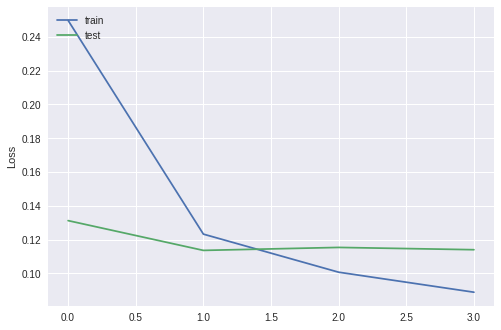

In [10]:
# utilizando o histórico: o gráfico da função de custo ao longo das épocas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

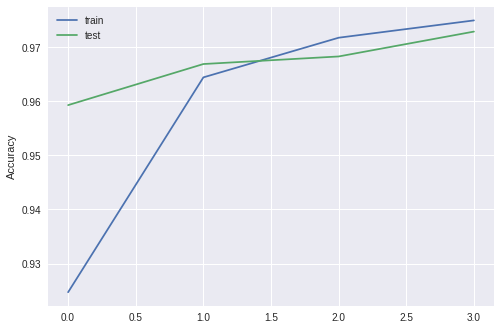

In [11]:
# utilizando o histórico: o gráfico da acurácia ao longo das épocas
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Exercício:
Tente modificar os parâmetros e arquitetura, utilizando as bases
MNIST e Fashion MNIST

Note que podemos usar qualquer tipo de base de dados que possamos organizar em um vetor de características, então você pode também carregar seus próprios dados (por exemplo com um arquivo csv) e treinar a rede neural